<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/10thWeekTasks/NN%20D2L_House%20Price_Muhammad%20Raihan%20B_1103213077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

Tugas Lecture 10 Neural Network D2L

Dataset : housepricedata.csv

Dokumentasi ChatGPT : https://chatgpt.com/share/bc494e35-f9cb-4df6-bd15-3e809d74ef4a

# IMPORT LIBRARY

In [36]:
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from google.colab import drive

# MOUNT GOOGLE DRIVE

In [37]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATASET

In [38]:
# Tentukan path ke file CSV
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Baca file CSV
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari dataframe
print(df.head())

   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  


# PREPROCESSING

In [39]:
# Membagi fitur dan target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konversi ke tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Membuat DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# MODELING

In [40]:
# Mendefinisikan arsitektur neural network
class HousePriceModel(nn.Module):
    def __init__(self):
        super(HousePriceModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(X_train.shape[1], 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

model = HousePriceModel()

# Definisi fungsi loss dan optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Fungsi pelatihan
def train(model, train_loader, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            # Forward pass
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Melatih model
train(model, train_loader, criterion, optimizer, epochs=100)


Epoch [10/100], Loss: 0.0751
Epoch [20/100], Loss: 0.0056
Epoch [30/100], Loss: 0.0552
Epoch [40/100], Loss: 0.0176
Epoch [50/100], Loss: 0.0231
Epoch [60/100], Loss: 0.0167
Epoch [70/100], Loss: 0.0737
Epoch [80/100], Loss: 0.0103
Epoch [90/100], Loss: 0.0058
Epoch [100/100], Loss: 0.0052


# EVALUASI MODEL

In [41]:
# Fungsi evaluasi
def evaluate(model, test_loader, criterion):
    model.eval()
    with torch.no_grad():
        losses = []
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            losses.append(loss.item())
        avg_loss = sum(losses) / len(losses)
    return avg_loss

# Evaluasi model
test_loss = evaluate(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.4f}')


Test Loss: 0.0806


# VISUALISASI MODEL

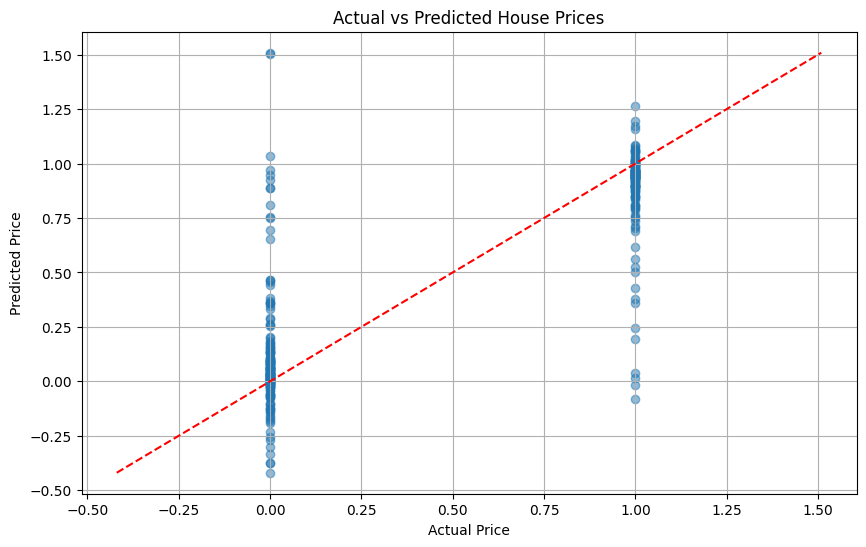

In [42]:
# Fungsi untuk membuat plot prediksi vs label sebenarnya
def plot_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        predictions = []
        labels = []
        for X_batch, y_batch in test_loader:
            preds = model(X_batch)
            predictions.extend(preds.tolist())
            labels.extend(y_batch.tolist())

        plt.figure(figsize=(10, 6))
        plt.scatter(labels, predictions, alpha=0.5)
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title('Actual vs Predicted House Prices')

        # Menambahkan garis diagonal putus-putus
        x = np.linspace(min(min(labels), min(predictions)), max(max(labels), max(predictions)), 100)
        plt.plot(x, x, 'r--')

        plt.grid(True)
        plt.show()

# Membuat plot
plot_predictions(model, test_loader)